In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [64]:
df = pd.read_csv("archive/reviews_750-1250.csv")
df = pd.read_csv("archive/reviews_500-750.csv")
df = pd.read_csv("archive/reviews_250-500.csv")
df = pd.read_csv("archive/reviews_0-250.csv")
df = pd.read_csv("archive/reviews_1250-end.csv")
df = pd.read_csv("archive/product_info.csv")

C:\Users\ashle\AppData\Local\Temp\ipykernel_34224\44895776.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("archive/reviews_750-1250.csv")
C:\Users\ashle\AppData\Local\Temp\ipykernel_34224\44895776.py:4: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("archive/reviews_0-250.csv")
C:\Users\ashle\AppData\Local\Temp\ipykernel_34224\44895776.py:5: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("archive/reviews_1250-end.csv")


In [67]:
df.head()

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,...,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0


In [70]:
df.dtypes

product_id             object
product_name           object
brand_id                int64
brand_name             object
loves_count             int64
rating                float64
reviews               float64
size                   object
variation_type         object
variation_value        object
variation_desc         object
ingredients            object
price_usd             float64
value_price_usd       float64
sale_price_usd        float64
limited_edition         int64
new                     int64
online_only             int64
out_of_stock            int64
sephora_exclusive       int64
highlights             object
primary_category       object
secondary_category     object
tertiary_category      object
child_count             int64
child_max_price       float64
child_min_price       float64
dtype: object

In [ ]:
# for my first question that I am trying to answer: 
# "is there a correlation between the price of a skincare product and its customer rating"
# to create the graph, use rating = int, price = float 

In [72]:
df.columns 

Index(['product_id', 'product_name', 'brand_id', 'brand_name', 'loves_count',
       'rating', 'reviews', 'size', 'variation_type', 'variation_value',
       'variation_desc', 'ingredients', 'price_usd', 'value_price_usd',
       'sale_price_usd', 'limited_edition', 'new', 'online_only',
       'out_of_stock', 'sephora_exclusive', 'highlights', 'primary_category',
       'secondary_category', 'tertiary_category', 'child_count',
       'child_max_price', 'child_min_price'],
      dtype='object')

In [74]:
df.describe()

,brand_id,loves_count,rating,reviews,price_usd,value_price_usd,sale_price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,child_count,child_max_price,child_min_price
count,8494.000000,8.494000e+03,8216.000000,8216.000000,8494.000000,451.000000,270.000000,8494.000000,8494.000000,8494.000000,8494.000000,8494.000000,8494.000000,2754.000000,2754.000000
mean,5422.440546,2.917957e+04,4.194513,448.545521,51.655595,91.168537,20.207889,0.070285,0.071698,0.219096,0.073699,0.279374,1.631622,53.792023,39.665802
std,1709.595957,6.609212e+04,0.516694,1101.982529,53.669234,79.195631,24.327352,0.255642,0.258002,0.413658,0.261296,0.448718,5.379470,58.765894,38.685720
min,1063.000000,0.000000e+00,1.000000,1.000000,3.000000,0.000000,1.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000
25%,5333.000000,3.758000e+03,3.981725,26.000000,25.000000,45.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,19.000000
50%,6157.500000,9.880000e+03,4.289350,122.000000,35.000000,67.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000,28.000000
75%,6328.000000,2.684125e+04,4.530525,418.000000,58.000000,108.500000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,59.000000,42.000000
max,8020.000000,1.401068e+06,5.000000,21281.000000,1900.000000,617.000000,320.000000,1.000000,1.000000,1.000000,1.000000,1.000000,105.000000,570.000000,400.000000


In [76]:
# Data Cleaning 

# checking for missing values 
df.isna().sum()

product_id               0
product_name             0
brand_id                 0
brand_name               0
loves_count              0
rating                 278
reviews                278
size                  1631
variation_type        1444
variation_value       1598
variation_desc        7244
ingredients            945
price_usd                0
value_price_usd       8043
sale_price_usd        8224
limited_edition          0
new                      0
online_only              0
out_of_stock             0
sephora_exclusive        0
highlights            2207
primary_category         0
secondary_category       8
tertiary_category      990
child_count              0
child_max_price       5740
child_min_price       5740
dtype: int64

In [97]:
# Fill missing values with appropriate placeholders
df['rating'] = df['rating'].fillna(df['rating'].mean())  # Fill with mean rating
df['reviews'] = df['reviews'].fillna(0)  # Assume 0 reviews if missing
df['size'] = df['size'].fillna('Unknown')  # Fill missing sizes with 'Unknown'
df['variation_type'] = df['variation_type'].fillna('Unknown')  # Fill variation_type
df['variation_value'] = df['variation_value'].fillna('Unknown')  # Fill variation_value
df['variation_desc'] = df['variation_desc'].fillna('Unknown')  # Fill variation_desc
df['ingredients'] = df['ingredients'].fillna('Not specified')  # Ingredients missing filled
df['value_price_usd'] = df['value_price_usd'].fillna(df['price_usd'])  # Use price_usd if value_price_usd is missing
df['sale_price_usd'] = df['sale_price_usd'].fillna(df['price_usd'])  # Assume no sale discount if missing
df['highlights'] = df['highlights'].fillna('No highlights provided')  # Fill highlights


In [ ]:
# Handle missing values for categorical columns
df['secondary_category'] = df['secondary_category'].fillna('Uncategorized')  # Fill with 'Uncategorized'
df['tertiary_category'] = df['tertiary_category'].fillna('Uncategorized')  # Fill with 'Uncategorized'

In [99]:
# Check and convert data types
df['price_usd'] = pd.to_numeric(df['price_usd'], errors='coerce')  # Ensure numeric
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')  # Ensure numeric
df['value_price_usd'] = pd.to_numeric(df['value_price_usd'], errors='coerce')  # Ensure numeric
df['sale_price_usd'] = pd.to_numeric(df['sale_price_usd'], errors='coerce')  # Ensure numeric
df['child_max_price'] = pd.to_numeric(df['child_max_price'], errors='coerce')  # Ensure numeric
df['child_min_price'] = pd.to_numeric(df['child_min_price'], errors='coerce')  # Ensure numeric

print(df.isna().sum())

product_id            0
product_name          0
brand_id              0
brand_name            0
loves_count           0
rating                0
reviews               0
size                  0
variation_type        0
variation_value       0
variation_desc        0
ingredients           0
price_usd             0
value_price_usd       0
sale_price_usd        0
limited_edition       0
new                   0
online_only           0
out_of_stock          0
sephora_exclusive     0
highlights            0
primary_category      0
secondary_category    0
tertiary_category     0
child_count           0
child_max_price       0
child_min_price       0
dtype: int64


In [101]:
# Update 
print(df.isnull().sum())

product_id            0
product_name          0
brand_id              0
brand_name            0
loves_count           0
rating                0
reviews               0
size                  0
variation_type        0
variation_value       0
variation_desc        0
ingredients           0
price_usd             0
value_price_usd       0
sale_price_usd        0
limited_edition       0
new                   0
online_only           0
out_of_stock          0
sephora_exclusive     0
highlights            0
primary_category      0
secondary_category    0
tertiary_category     0
child_count           0
child_max_price       0
child_min_price       0
dtype: int64


In [103]:
# This is to drop any missing values 
df.dropna(inplace=True)

In [ ]:
# Drop rows with missing values in price or rating
df = df.dropna(subset=['price_usd', 'rating'])

In [ ]:
 # Categorize products according to sephora wesbite 

In [229]:
keywords_to_categories = {
    'moisturizer': 'Moisturizers',
    'night cream': 'Moisturizers',
    'face oils': 'Moisturizers',
    'mists': 'Moisturizers',
    'essences': 'Moisturizers',
    'BB cream': 'Moisturizers',
    'CC cream': 'Moisturizers',
    'face wash': 'Cleansers',
    'cleanser': 'Cleansers',
    'makeup removers': 'Cleansers',
    'face wipes': 'Cleansers',
    'toners': 'Cleansers',
    'treatment': 'Treatments',
    'face serums': 'Treatments',
    'acne treatments': 'Treatments',
    'blemish treatment': 'Treatments',
    'facial peels': 'Treatments',
    'face masks': 'Masks',
    'sheet masks': 'Masks',
    'eye masks': 'Masks',
    'balm': 'Lip balm',
    'sunscreen': 'Sunscreen',
    'face sunscreen': 'Sunscreen',
    'body sunscreen': 'Sunscreen',
    'supplements' : 'Wellness', 
    'feminine care' : 'Wellness', 
    
}


In [111]:
# Function
def categorize_product(name):
    name = name.lower()
    for keyword, category in keywords_to_categories.items():
        if keyword in name:
            return category
    return 'Other' 
# returns other when the category doesnt fall under any of these

if 'product_name' in df.columns:
    df['category'] = df['product_name'].apply(categorize_product)
else:
    print("The column 'product_name' does not exist in the DataFrame.")

NameError: name 'keywords_to_categories' is not defined

In [286]:
print(df['category'].value_counts())

category
Other           26836
Moisturizers     3316
Cleansers        3103
Treatments       2443
Sunscreen        1681
Lip balm         1026
Masks             151
Name: count, dtype: int64


In [209]:
import matplotlib.pyplot as plt

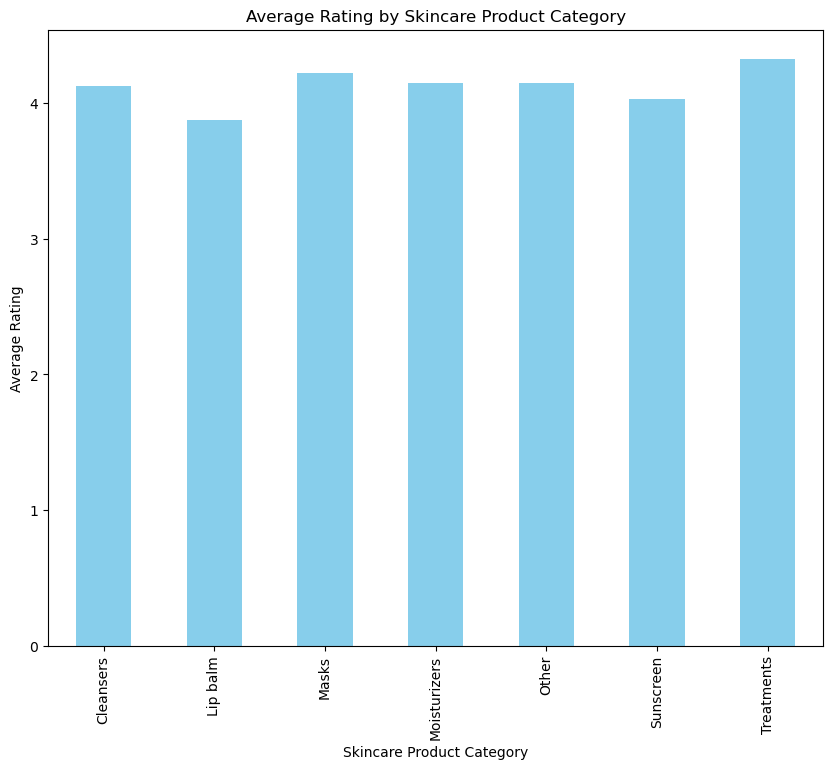

In [278]:
category_ratings = df.groupby('category')['rating'].mean()
fig, ax = plt.subplots(figsize=(10,8))
category_ratings.plot(kind='bar', color= 'skyblue', ax=ax)
ax.set(title="Average Rating by Skincare Product Category", xlabel="Skincare Product Category", ylabel="Average Rating")
plt.show()

In [292]:
category_ratings = df.groupby('category')['rating'].mean()
print(category_ratings)

category
Cleansers       4.129230
Lip balm        3.876218
Masks           4.225166
Moisturizers    4.149276
Other           4.146743
Sunscreen       4.027365
Treatments      4.326238
Name: rating, dtype: float64


In [213]:
correlation = df['price_usd'].corr(df['rating'])
print(f"Correlation between price and rating: {correlation}")

Correlation between price and rating: 0.011041275157950284


In [ ]:
# Finding: The correlation is weak. Price does not impact product rating. 

In [91]:
import matplotlib.pyplot as plt 

In [93]:
import seaborn as sns

In [ ]:
# Create a scatterplot to now visualize the relationship 

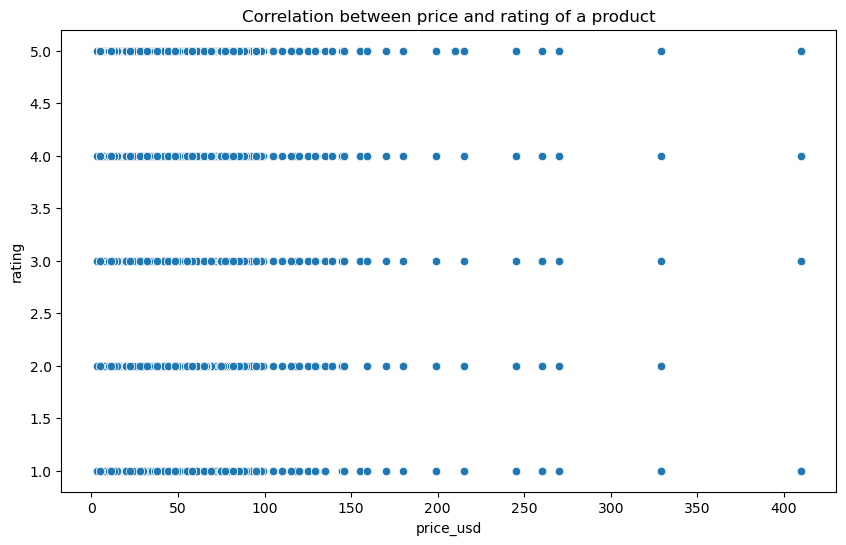

In [257]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='price_usd', y='rating', data=df) 
plt.title('Correlation between price and rating of a product')
plt.xlabel('price_usd')
plt.ylabel('rating')
plt.show()

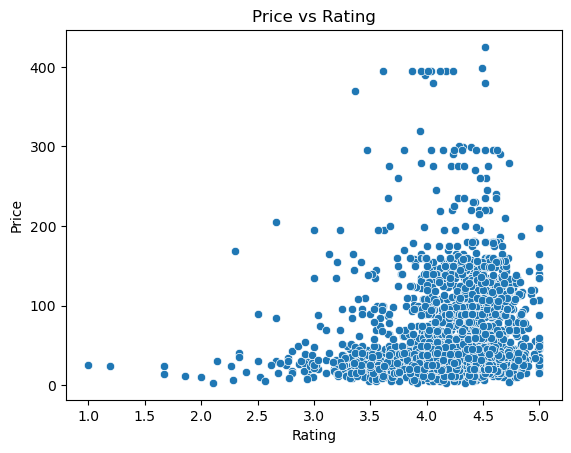

Correlation between price and rating:
             rating  price_usd
rating     1.000000   0.096342
price_usd  0.096342   1.000000


In [113]:
# Step 3: Exploratory Analysis
# Scatterplot to visualize relationship
sns.scatterplot(x='rating', y='price_usd', data=df)
plt.title('Price vs Rating')
plt.xlabel('Rating')
plt.ylabel('Price')
plt.show()

# Check correlation
correlation = df[['rating', 'price_usd']].corr()
print("Correlation between price and rating:")
print(correlation)

# Step 4: Prepare Data for Modeling
X = df[['rating']]  # Independent variable
y = df['price_usd']     # Dependent variable


In [115]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [145]:
# Step 5: Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [147]:
# Step 7: Make Predictions
y_pred = model.predict(X_test)


In [149]:
from math import sqrt

# Step 6: Evaluate the Model
y_pred = model.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)

# Print metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")


Mean Absolute Error (MAE): 36.37331647328803
Mean Squared Error (MSE): 2282.8858247298986
Root Mean Squared Error (RMSE): 47.77955446349305
R-squared (R²): 0.014735590868835358


In [151]:
# Experiment #2 
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


In [127]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
print(f"Root Mean Squared Error (RMSE) - Random Forest: {rmse_rf}")


Root Mean Squared Error (RMSE) - Random Forest: 59.3289691948222


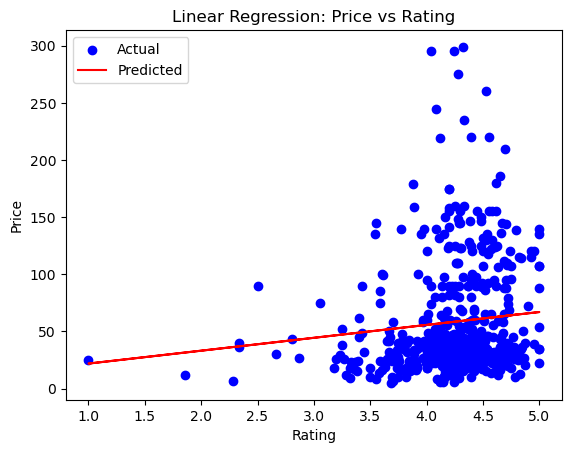

In [121]:
#Visualize Results
# Plot the regression line
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.title('Linear Regression: Price vs Rating')
plt.xlabel('Rating')
plt.ylabel('Price')
plt.legend()
plt.show()

In [153]:
#Experiment #3 starts here
print(df['brand_name'].value_counts())


brand_name
SEPHORA COLLECTION    103
Dior                   65
tarte                  59
Charlotte Tilbury      59
CLINIQUE               54
                     ... 
Soleil Toujours         1
Evian                   1
StriVectin              1
DUO                     1
Crown Affair            1
Name: count, Length: 261, dtype: int64


In [155]:
brand_analysis = df.groupby('brand_name')[['rating', 'loves_count', 'reviews']].mean()
print(brand_analysis.sort_values(by='rating', ascending=False))


                          rating   loves_count     reviews
brand_name                                                
Rossano Ferretti Parma  4.984833    828.333333    9.333333
Aquis                   4.904800   3942.000000   42.000000
RANAVAT                 4.782400   7269.000000  216.000000
Kate McLeod             4.778533   2156.333333  101.666667
MARA                    4.764667   3038.333333   75.000000
...                          ...           ...         ...
Bio Ionic               3.565200   3691.000000   23.000000
NAILS INC.              3.548700  29681.750000  144.500000
INC.redible             3.426800  16805.875000   99.625000
SIMIHAZE BEAUTY         3.286800   6214.400000   52.000000
Good Dye Young          3.062050  12179.000000  194.500000

[261 rows x 3 columns]


In [159]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# Isolate the feature and target
X = df[['brand_name']]
y = df['rating']  # Or your target variable

# One-Hot Encoding
encoder = OneHotEncoder(handle_unknown='ignore')
X_encoded = encoder.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


In [161]:
#One-hot encoding 
from sklearn.preprocessing import LabelEncoder

# Label Encode brand_name
encoder = LabelEncoder()
df['brand_encoded'] = encoder.fit_transform(df['brand_name'])

# Isolate the feature and target
X = df[['brand_encoded']]
y = df['rating']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [169]:
# Linear Regression 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error (RMSE): {rmse}")


Root Mean Squared Error (RMSE): 0.44519732089901115


C:\Users\ashle\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
